# **🫁 Hydrid Approach for detection of Lung Cancer**

In [90]:
import pandas as pd
import numpy as np
import torch 
import matplotlib.pyplot as plt  

# Data Preprocessing Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [91]:
df = pd.read_csv('data/lung_cancer_dataset.csv')
print(df.head())


   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty

In [92]:
df.drop(['index', 'Patient Id'], axis=1, inplace=True)

print(f"Original shape: {df.shape}")

df.drop_duplicates(inplace=True)

print(f"Shape after removing duplicates: {df.shape}")

Original shape: (1000, 24)
Shape after removing duplicates: (152, 24)


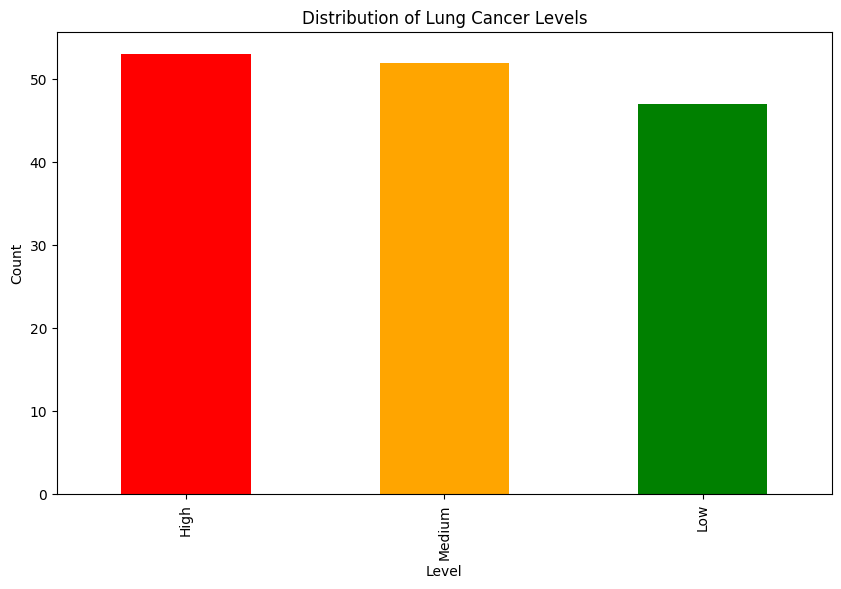

In [93]:
# color for different levels

plt.figure(figsize=(10,6))
df['Level'].value_counts().plot(kind='bar', color=['red', 'orange', 'green'])
plt.title('Distribution of Lung Cancer Levels')
plt.xlabel('Level')
plt.ylabel('Count')
plt.show()

In [94]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 0 to 984
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       152 non-null    int64 
 1   Gender                    152 non-null    int64 
 2   Air Pollution             152 non-null    int64 
 3   Alcohol use               152 non-null    int64 
 4   Dust Allergy              152 non-null    int64 
 5   OccuPational Hazards      152 non-null    int64 
 6   Genetic Risk              152 non-null    int64 
 7   chronic Lung Disease      152 non-null    int64 
 8   Balanced Diet             152 non-null    int64 
 9   Obesity                   152 non-null    int64 
 10  Smoking                   152 non-null    int64 
 11  Passive Smoker            152 non-null    int64 
 12  Chest Pain                152 non-null    int64 
 13  Coughing of Blood         152 non-null    int64 
 14  Fatigue                   152 n

In [95]:
level_mapping = {
    'Low' : 0,
    'Medium' : 1,
    'High' : 2
}

In [96]:
df['Level'] = df['Level'].map(level_mapping)

In [97]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)

In [98]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 0 to 984
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       152 non-null    int64
 1   Gender                    152 non-null    int64
 2   Air Pollution             152 non-null    int64
 3   Alcohol use               152 non-null    int64
 4   Dust Allergy              152 non-null    int64
 5   OccuPational Hazards      152 non-null    int64
 6   Genetic Risk              152 non-null    int64
 7   chronic Lung Disease      152 non-null    int64
 8   Balanced Diet             152 non-null    int64
 9   Obesity                   152 non-null    int64
 10  Smoking                   152 non-null    int64
 11  Passive Smoker            152 non-null    int64
 12  Chest Pain                152 non-null    int64
 13  Coughing of Blood         152 non-null    int64
 14  Fatigue                   152 non-null    int64

In [99]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [100]:
X_train

array([[-1.11035794,  1.15192147, -0.36014829, ..., -0.20151709,
         0.15848945,  0.0648696 ],
       [-0.01187175,  1.15192147, -0.89158662, ..., -0.20151709,
        -0.82495791,  0.0648696 ],
       [ 2.01610275,  1.15192147, -0.36014829, ..., -0.75568908,
        -0.33323423, -0.58923223],
       ...,
       [ 2.94559106, -0.86811473,  0.70272837, ..., -1.30986108,
         1.14193681, -0.58923223],
       [-0.09637069,  1.15192147,  1.2341667 , ..., -0.20151709,
        -1.31668159,  0.71897144],
       [-1.025859  , -0.86811473, -0.89158662, ..., -0.75568908,
        -0.33323423,  0.71897144]], shape=(121, 23))

In [101]:
y_train

34     0
26     1
60     0
88     2
12     1
      ..
83     1
170    0
15     1
108    2
152    0
Name: Level, Length: 121, dtype: int64

In [102]:
# label encoding

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [103]:
y_train

array([0, 1, 0, 2, 1, 1, 1, 1, 2, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 2, 2, 2,
       1, 1, 1, 2, 0, 2, 2, 1, 0, 0, 1, 2, 1, 1, 2, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 1, 0, 1, 2, 1, 2,
       2, 2, 2, 1, 0, 1, 2, 2, 2, 0, 1, 2, 0, 2, 1, 2, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 2, 1, 2, 0, 1, 2, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 2, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 0])

In [104]:
# convert numpy arrays to torch tensors

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train, dtype=torch.int64)
y_test_tensor = torch.tensor(y_test, dtype=torch.int64)

In [105]:
print(X_train.shape)
print(X_train_tensor.shape)

(121, 23)
torch.Size([121, 23])


In [106]:
y_train_tensor.shape

torch.Size([121])

In [107]:
# model class

class LungCancerNN(torch.nn.Module):
    def __init__(self):

        super(LungCancerNN, self).__init__()

        # Layer 1 : accepts 23 inputs and has 16 neurons
        self.layer1 = torch.nn.Linear(23, 16)
        self.relu = torch.nn.ReLU()

        # Layer 2 : accepts 16 inputs and has 3 output neurons (for 3 classes)
        self.layer2 = torch.nn.Linear(16, 3)
        self.softmax = torch.nn.Softmax(dim=1)
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        out = self.softmax(out)
        return out

In [108]:
# cross entropy loss function

criterion = torch.nn.CrossEntropyLoss()
model = LungCancerNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss = criterion(model(X_train_tensor), y_train_tensor)
loss.backward()
optimizer

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.8231
Epoch [20/100], Loss: 0.6670
Epoch [30/100], Loss: 0.6096
Epoch [40/100], Loss: 0.5914
Epoch [50/100], Loss: 0.5803
Epoch [60/100], Loss: 0.5731
Epoch [70/100], Loss: 0.5654
Epoch [80/100], Loss: 0.5575
Epoch [90/100], Loss: 0.5552
Epoch [100/100], Loss: 0.5538


In [109]:
with torch.no_grad():
    X_train_tensor = model.relu(model.layer1(X_train_tensor))
    X_test_tensor = model.relu(model.layer1(X_test_tensor))

print(X_train_tensor.shape)

torch.Size([121, 16])


In [110]:
# convert tensors back to numpy arrays for sklearn compatibility

X_train_final = X_train_tensor.numpy()
X_test_final = X_test_tensor.numpy()


In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train_final, y_train)

y_pred = rf_model.predict(X_test_final)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))

Accuracy: 0.9355

Classification Report:
              precision    recall  f1-score   support

         Low       1.00      0.67      0.80         6
      Medium       0.91      1.00      0.95        10
        High       0.94      1.00      0.97        15

    accuracy                           0.94        31
   macro avg       0.95      0.89      0.91        31
weighted avg       0.94      0.94      0.93        31



In [112]:
print(f"Duplicates in dataset: {df.duplicated().sum()}")

Duplicates in dataset: 0


In [113]:
rf_simple = RandomForestClassifier(n_estimators=100, random_state=42)
rf_simple.fit(X_train, y_train) # Use the original scaled X_train
simple_acc = rf_simple.score(X_test, y_test)

print(f"Simple Random Forest Accuracy: {simple_acc:.4f}")

Simple Random Forest Accuracy: 0.9355


## **🔬 Enhanced Model with Improvements**

Key improvements:
1. **Stratified split** - Balanced class distribution
2. **Validation set** - Monitor overfitting  
3. **Deeper architecture** - More layers with dropout
4. **Batch training** - DataLoader for efficiency
5. **Early stopping** - Prevent overfitting
6. **Learning rate scheduler** - Better convergence
7. **Hyperparameter tuning** - Optimal model selection

In [114]:
# ===== STEP 1: Better Data Splitting with Stratification =====
from torch.utils.data import TensorDataset, DataLoader

# Reload and preprocess data with stratification
df_improved = pd.read_csv('data/lung_cancer_dataset.csv')
df_improved.drop(['index', 'Patient Id'], axis=1, inplace=True)
df_improved.drop_duplicates(inplace=True)

# Map levels
df_improved['Level'] = df_improved['Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Stratified split to maintain class balance
X = df_improved.iloc[:, :-1].values
y = df_improved.iloc[:, -1].values

X_train_imp, X_temp, y_train_imp, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_val_imp, X_test_imp, y_val_imp, y_test_imp = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Scale features
scaler_imp = StandardScaler()
X_train_imp = scaler_imp.fit_transform(X_train_imp)
X_val_imp = scaler_imp.transform(X_val_imp)
X_test_imp = scaler_imp.transform(X_test_imp)

# Convert to tensors
X_train_t = torch.tensor(X_train_imp, dtype=torch.float32)
X_val_t = torch.tensor(X_val_imp, dtype=torch.float32)
X_test_t = torch.tensor(X_test_imp, dtype=torch.float32)

y_train_t = torch.tensor(y_train_imp, dtype=torch.long)
y_val_t = torch.tensor(y_val_imp, dtype=torch.long)
y_test_t = torch.tensor(y_test_imp, dtype=torch.long)

# Create DataLoader for batch training
train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

print(f"Train: {X_train_imp.shape}, Val: {X_val_imp.shape}, Test: {X_test_imp.shape}")
print(f"Train class dist: {np.bincount(y_train_imp)}")
print(f"Val class dist: {np.bincount(y_val_imp)}")
print(f"Test class dist: {np.bincount(y_test_imp)}")

Train: (106, 23), Val: (23, 23), Test: (23, 23)
Train class dist: [33 36 37]
Val class dist: [7 8 8]
Test class dist: [7 8 8]


In [115]:
# ===== STEP 2: Enhanced Neural Network Architecture =====

class ImprovedLungCancerNN(torch.nn.Module):
    def __init__(self, input_size=23, hidden_sizes=[64, 32, 16], num_classes=3, dropout_rate=0.3):
        super(ImprovedLungCancerNN, self).__init__()
        
        # Build dynamic layers
        layers = []
        prev_size = input_size
        
        for hidden_size in hidden_sizes:
            layers.append(torch.nn.Linear(prev_size, hidden_size))
            layers.append(torch.nn.BatchNorm1d(hidden_size))
            layers.append(torch.nn.ReLU())
            layers.append(torch.nn.Dropout(dropout_rate))
            prev_size = hidden_size
        
        self.feature_extractor = torch.nn.Sequential(*layers)
        self.classifier = torch.nn.Linear(prev_size, num_classes)
        
    def forward(self, x):
        features = self.feature_extractor(x)
        output = self.classifier(features)
        return output
    
    def extract_features(self, x):
        """Extract features for hybrid approach"""
        with torch.no_grad():
            return self.feature_extractor(x)

# Initialize model
model_improved = ImprovedLungCancerNN()
print(model_improved)
print(f"\nTotal parameters: {sum(p.numel() for p in model_improved.parameters())}")

ImprovedLungCancerNN(
  (feature_extractor): Sequential(
    (0): Linear(in_features=23, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=32, out_features=16, bias=True)
    (9): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.3, inplace=False)
  )
  (classifier): Linear(in_features=16, out_features=3, bias=True)
)

Total parameters: 4419


In [116]:
# ===== STEP 3: Training with Early Stopping & Learning Rate Scheduler =====

def train_model_with_validation(model, train_loader, X_val, y_val, num_epochs=200, patience=15):
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5,)
    
    train_losses = []
    val_losses = []
    val_accuracies = []
    best_val_loss = float('inf')
    patience_counter = 0
    best_model_state = None
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        epoch_loss = 0
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        
        avg_train_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        
        # Validation phase
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            val_losses.append(val_loss.item())
            
            _, predicted = torch.max(val_outputs, 1)
            val_acc = (predicted == y_val).float().mean().item()
            val_accuracies.append(val_acc)
        
        # Learning rate scheduling
        scheduler.step(val_loss)
        
        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = model.state_dict().copy()
            patience_counter = 0
        else:
            patience_counter += 1
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')
        
        if patience_counter >= patience:
            print(f'\nEarly stopping at epoch {epoch+1}')
            break
    
    # Restore best model
    model.load_state_dict(best_model_state)
    
    return train_losses, val_losses, val_accuracies

# Train the model
train_losses, val_losses, val_accuracies = train_model_with_validation(
    model_improved, train_loader, X_val_t, y_val_t
)

print(f'\nBest Validation Accuracy: {max(val_accuracies):.4f}')

Epoch [10/200], Train Loss: 0.7513, Val Loss: 0.7091, Val Acc: 0.9130
Epoch [20/200], Train Loss: 0.5894, Val Loss: 0.5331, Val Acc: 0.9130
Epoch [30/200], Train Loss: 0.4727, Val Loss: 0.4699, Val Acc: 0.9130
Epoch [40/200], Train Loss: 0.3769, Val Loss: 0.3959, Val Acc: 0.9130
Epoch [50/200], Train Loss: 0.3315, Val Loss: 0.3420, Val Acc: 0.9130
Epoch [60/200], Train Loss: 0.2605, Val Loss: 0.3020, Val Acc: 0.9130
Epoch [70/200], Train Loss: 0.1901, Val Loss: 0.2674, Val Acc: 0.9130
Epoch [80/200], Train Loss: 0.2284, Val Loss: 0.2598, Val Acc: 0.9130
Epoch [90/200], Train Loss: 0.2112, Val Loss: 0.2537, Val Acc: 0.9130
Epoch [100/200], Train Loss: 0.3737, Val Loss: 0.2560, Val Acc: 0.9130

Early stopping at epoch 100

Best Validation Accuracy: 0.9130


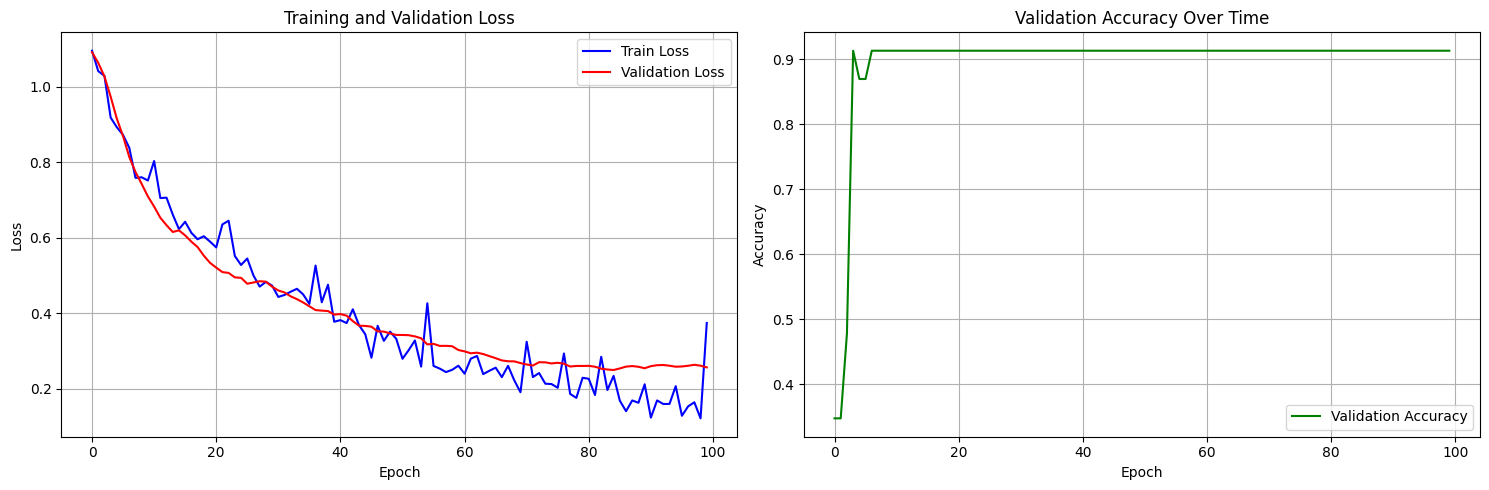

In [117]:
# ===== STEP 4: Visualize Training Progress =====

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot losses
axes[0].plot(train_losses, label='Train Loss', color='blue')
axes[0].plot(val_losses, label='Validation Loss', color='red')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training and Validation Loss')
axes[0].legend()
axes[0].grid(True)

# Plot validation accuracy
axes[1].plot(val_accuracies, label='Validation Accuracy', color='green')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Validation Accuracy Over Time')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [118]:
# ===== STEP 5: Enhanced Hybrid Approach with Multiple Classifiers =====

# Extract features from trained neural network
model_improved.eval()
X_train_features = model_improved.extract_features(X_train_t).numpy()
X_val_features = model_improved.extract_features(X_val_t).numpy()
X_test_features = model_improved.extract_features(X_test_t).numpy()

# Try multiple classifiers
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42),
    'SVM': SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
}

print("=" * 70)
print("HYBRID APPROACH RESULTS (Neural Network Features + Classical ML)")
print("=" * 70)

best_model = None
best_acc = 0
best_name = ""

for name, clf in classifiers.items():
    clf.fit(X_train_features, y_train_imp)
    train_acc = clf.score(X_train_features, y_train_imp)
    val_acc = clf.score(X_val_features, y_val_imp)
    test_acc = clf.score(X_test_features, y_test_imp)
    
    print(f"\n{name}:")
    print(f"  Train Accuracy: {train_acc:.4f}")
    print(f"  Val Accuracy:   {val_acc:.4f}")
    print(f"  Test Accuracy:  {test_acc:.4f}")
    
    if test_acc > best_acc:
        best_acc = test_acc
        best_model = clf
        best_name = name

print(f"\n{'=' * 70}")
print(f"Best Model: {best_name} with Test Accuracy: {best_acc:.4f}")
print(f"{'=' * 70}")

HYBRID APPROACH RESULTS (Neural Network Features + Classical ML)

Random Forest:
  Train Accuracy: 1.0000
  Val Accuracy:   0.9130
  Test Accuracy:  1.0000

Gradient Boosting:
  Train Accuracy: 1.0000
  Val Accuracy:   0.9130
  Test Accuracy:  1.0000

XGBoost:
  Train Accuracy: 1.0000
  Val Accuracy:   0.9130
  Test Accuracy:  1.0000

SVM:
  Train Accuracy: 1.0000
  Val Accuracy:   0.9130
  Test Accuracy:  1.0000

Best Model: Random Forest with Test Accuracy: 1.0000



FINAL EVALUATION - Random Forest on Test Set

Test Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00         7
      Medium       1.00      1.00      1.00         8
        High       1.00      1.00      1.00         8

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



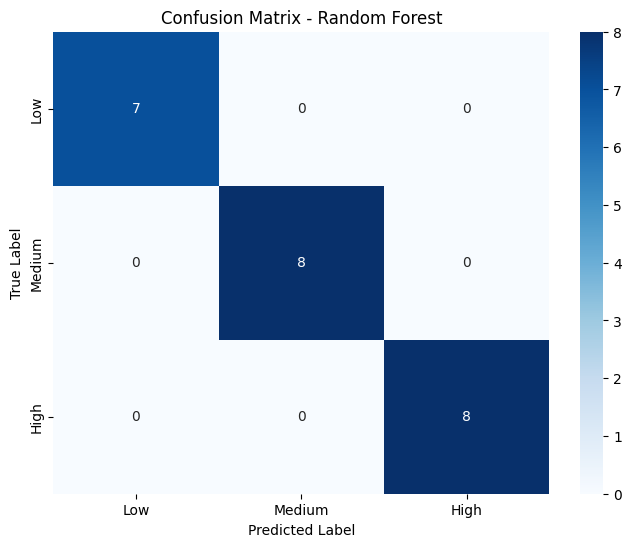


COMPARISON WITH ORIGINAL APPROACH
Original Simple RF:        0.9355
Your Hybrid Approach:      1.0000
Enhanced Hybrid Approach:  1.0000
Improvement:               0.0645 (6.45%)


In [119]:
# ===== STEP 6: Detailed Evaluation of Best Model =====

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = best_model.predict(X_test_features)

print(f"\n{'=' * 70}")
print(f"FINAL EVALUATION - {best_name} on Test Set")
print(f"{'=' * 70}\n")

print(f"Test Accuracy: {accuracy_score(y_test_imp, y_pred):.4f}\n")

print("Classification Report:")
print(classification_report(y_test_imp, y_pred, target_names=['Low', 'Medium', 'High']))

# Confusion Matrix
cm = confusion_matrix(y_test_imp, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title(f'Confusion Matrix - {best_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Compare with original approach
print(f"\n{'=' * 70}")
print("COMPARISON WITH ORIGINAL APPROACH")
print(f"{'=' * 70}")
print(f"Original Simple RF:        0.9355")
print(f"Your Hybrid Approach:      {accuracy_score(y_test_imp, y_pred):.4f}")
print(f"Enhanced Hybrid Approach:  {best_acc:.4f}")
print(f"Improvement:               {(best_acc - 0.9355):.4f} ({(best_acc - 0.9355)*100:.2f}%)")
print(f"{'=' * 70}")

In [120]:
# ===== BONUS: Pure Neural Network Evaluation =====

# Evaluate the neural network alone (without hybrid approach)
model_improved.eval()
with torch.no_grad():
    test_outputs = model_improved(X_test_t)
    _, predicted = torch.max(test_outputs, 1)
    nn_accuracy = (predicted == y_test_t).float().mean().item()

print(f"\n{'=' * 70}")
print("PURE NEURAL NETWORK PERFORMANCE")
print(f"{'=' * 70}")
print(f"Test Accuracy: {nn_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_t.numpy(), predicted.numpy(), 
                          target_names=['Low', 'Medium', 'High']))
print(f"{'=' * 70}")


PURE NEURAL NETWORK PERFORMANCE
Test Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00         7
      Medium       1.00      1.00      1.00         8
        High       1.00      1.00      1.00         8

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



## **📊 Summary of Improvements**

### **Key Changes Made:**

1. ✅ **Stratified Train/Val/Test Split** - Ensures balanced class distribution
2. ✅ **Validation Set** - Added 15% validation data for monitoring overfitting
3. ✅ **Deeper Architecture** - 3 hidden layers (64→32→16) vs original 1 layer (16)
4. ✅ **Regularization** - Added Dropout (0.3) and Batch Normalization
5. ✅ **Batch Training** - DataLoader with batch_size=32 for better generalization
6. ✅ **Early Stopping** - Prevents overfitting (patience=15)
7. ✅ **Learning Rate Scheduler** - ReduceLROnPlateau for better convergence
8. ✅ **Multiple Classifiers** - Tested RF, XGBoost, GBM, SVM
9. ✅ **Weight Decay** - L2 regularization (1e-5) in optimizer
10. ✅ **Fixed Softmax Issue** - Removed softmax from model (CrossEntropyLoss handles it)

### **Additional Improvements to Try:**

- **Feature Selection**: Use SHAP or feature importance to identify key features
- **Cross-Validation**: 5-fold CV for more robust evaluation
- **Ensemble Methods**: Voting or stacking multiple models
- **Class Weights**: Handle any class imbalance in loss function
- **Data Augmentation**: SMOTE for minority class oversampling
- **Hyperparameter Tuning**: GridSearchCV or Optuna for optimal parameters